Import Statements

In [5]:
import json
import sys
import re
import pandas as pd
import nltk
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
stopwords = stopwords.words("english")
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Z87-4770\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
train = pd.read_csv("train.csv")
test = pd.read_csv("posts.csv")

Remove Blanks, punctuation, stopwords

In [7]:
train.dropna(subset=["text"], inplace=True)
train.text = train.text.apply(lambda x: re.sub(r"[^\w\s]", "", x))
train.text = train.text.apply(lambda x: re.sub(r"\(?http\S+", "", x))
train.text = train.text.apply(lambda x: " ".join([word for word in nltk.word_tokenize(x) if word.lower() not in stopwords]))

In [8]:
test.dropna(subset=["text"], inplace=True)
test.text = test.text.apply(lambda x: re.sub(r"[^\w\s]", "", x))
test.text = test.text.apply(lambda x: re.sub(r"\(?http\S+", "", x))
test.text = test.text.apply(lambda x: " ".join([word for word in nltk.word_tokenize(x) if word.lower() not in stopwords]))

Lemmatization

In [9]:
lem = nltk.WordNetLemmatizer()
train.text = train.text.apply(lambda x:" ".join([lem.lemmatize(word) for word in nltk.word_tokenize(x)]))

In [10]:
lem2 = nltk.WordNetLemmatizer()
test.text = test.text.apply(lambda x:" ".join([lem2.lemmatize(word) for word in nltk.word_tokenize(x)]))

Training Classifier

In [11]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [12]:
vec = CountVectorizer()
x_train = vec.fit_transform(train.text)
y_test = vec.transform(test.text)

In [13]:
nb = MultinomialNB()
nb.fit(x_train, train.sentiment)

MultinomialNB()

Prediction

In [14]:
y_predicted = nb.predict(y_test)

Outputting prediction to csv and matching submission format

In [15]:
test["sentiment"] = y_predicted
test.to_csv("prediction.csv")

### Comparisons

<BarContainer object of 3 artists>

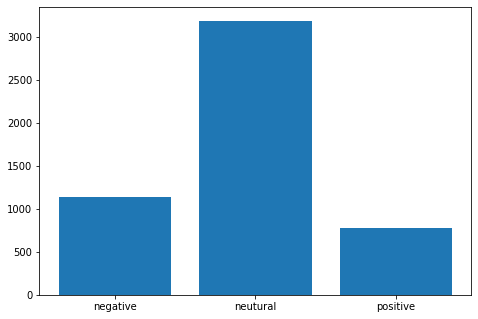

In [16]:
kaggle_sentiment_count = [1134, 3193, 773]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x_axis = ["negative", "neutural", "positive"]
ax.bar(x_axis, kaggle_sentiment_count)

<BarContainer object of 3 artists>

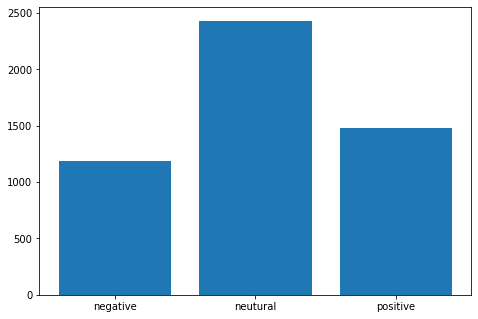

In [17]:
vader_sentiment_count = [1187, 2431, 1482]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x_axis = ["negative", "neutural", "positive"]
ax.bar(x_axis, vader_sentiment_count)